# Solution By: Vipin Choudhary
 Last updated October 30, 2020

### Project - Concrete Strength Prediction
### Problem Statement:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%

### Objective:
##### To predict the concrete strength¶

### Importing Required Packages

In [118]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression


##### Github Link:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-vipinexl

##### Reading the input file

In [119]:
df = pd.read_csv('C:/Users/choud/Downloads/UTA/Concrete_Strength_Prediction/concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Exploratory Data Analysis

In [120]:
df.shape

(1030, 9)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### There are no duplicates in  the data

In [122]:
# Checking Unique Keys
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

##### No unique Identifier in the dataframe

In [123]:
# Checking Missing Values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### Though there are no missing values in the dataframe but there are unknowns

In [124]:
# Checking basic statistics like central value, std, quartiles about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### The data does not contain any missing values or special symbols, but it has 0 value in few columns, which will be treated during further analysis.

In [125]:
# Identifying Outliers with Interquartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


##### Considering the difference b/w ( Q1,median ) and (Q3 and median) in columns Cement, slag & ash has huge number of outliers.
##### Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers

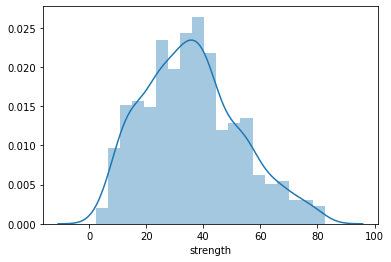

In [126]:
sns.distplot(df['strength'])


##### The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range


In [127]:
print("Skewness = ",df['strength'].skew())

Skewness =  0.41697728841071807


In [128]:
# Checking different percentiles for field Balance
df['strength'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
0.05%       2.839355
0.5%        5.098650
1%          6.885800
10%        14.200000
20%        20.960000
30%        25.474000
50%        34.445000
80%        50.514000
90%        58.820000
99%        77.300000
max        82.600000
Name: strength, dtype: float64

In [129]:
# Checking different percentiles for field campaign
df['slag'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
50%        22.000000
80%       163.180000
90%       192.000000
99%       290.200000
max       359.400000
Name: slag, dtype: float64

In [130]:
# Checking different percentiles for field campaign
df['ash'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
50%         0.000000
80%       123.000000
90%       141.060000
99%       185.213000
max       200.100000
Name: ash, dtype: float64

In [131]:
# Checking different percentiles for field campaign
df['superplastic'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
50%         6.400000
80%        11.100000
90%        12.210000
99%        23.400000
max        32.200000
Name: superplastic, dtype: float64

In [132]:
# Checking different percentiles for field previous
df['coarseagg'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
1%        817.929000
10%       852.100000
20%       913.980000
30%       936.000000
50%       968.000000
80%      1047.000000
90%      1076.450000
99%      1125.000000
max      1145.000000
Name: coarseagg, dtype: float64

In [133]:
# Checking different percentiles for field age
df['age'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
1%          3.000000
10%         3.000000
20%         7.000000
30%        14.000000
50%        28.000000
80%        56.000000
90%       100.000000
99%       365.000000
max       365.000000
Name: age, dtype: float64

In [134]:
# Checking Skewness in the fields. 
print(df['cement'].skew())
print(df['slag'].skew())
print(df['ash'].skew())
print(df['water'].skew())
print(df['superplastic'].skew())
print(df['coarseagg'].skew())
print(df['fineagg'].skew())
print(df['age'].skew())

0.5094811788717731
0.8007168956061774
0.5373539058066844
0.07462838428549402
0.9072025748672466
-0.04021974481106704
-0.25300959769707143
3.2691774006345895


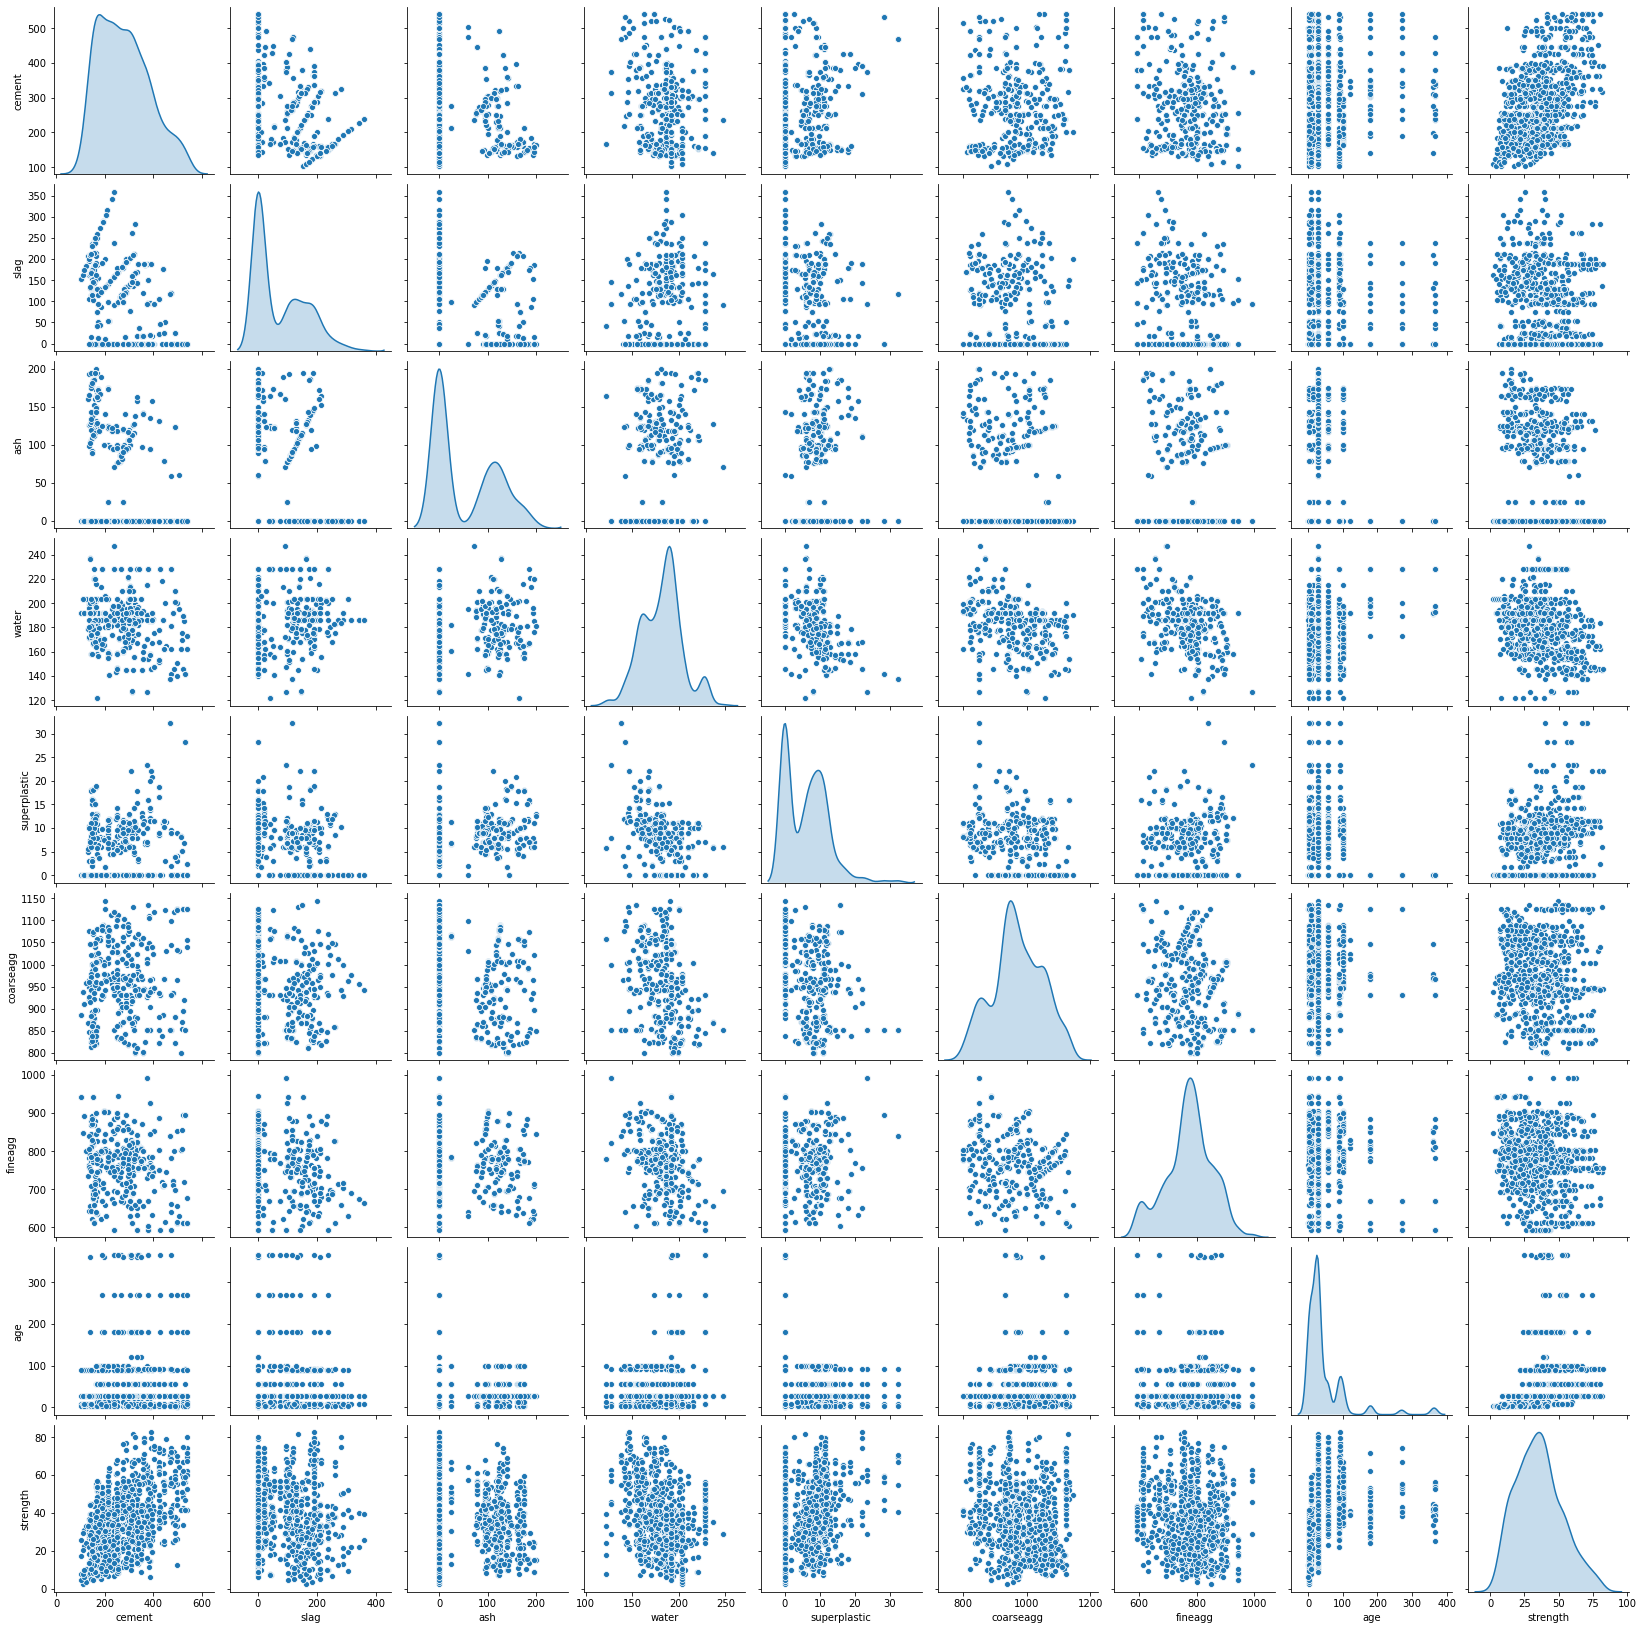

In [135]:
sns.pairplot(df, diag_kind='kde')

In [136]:

def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

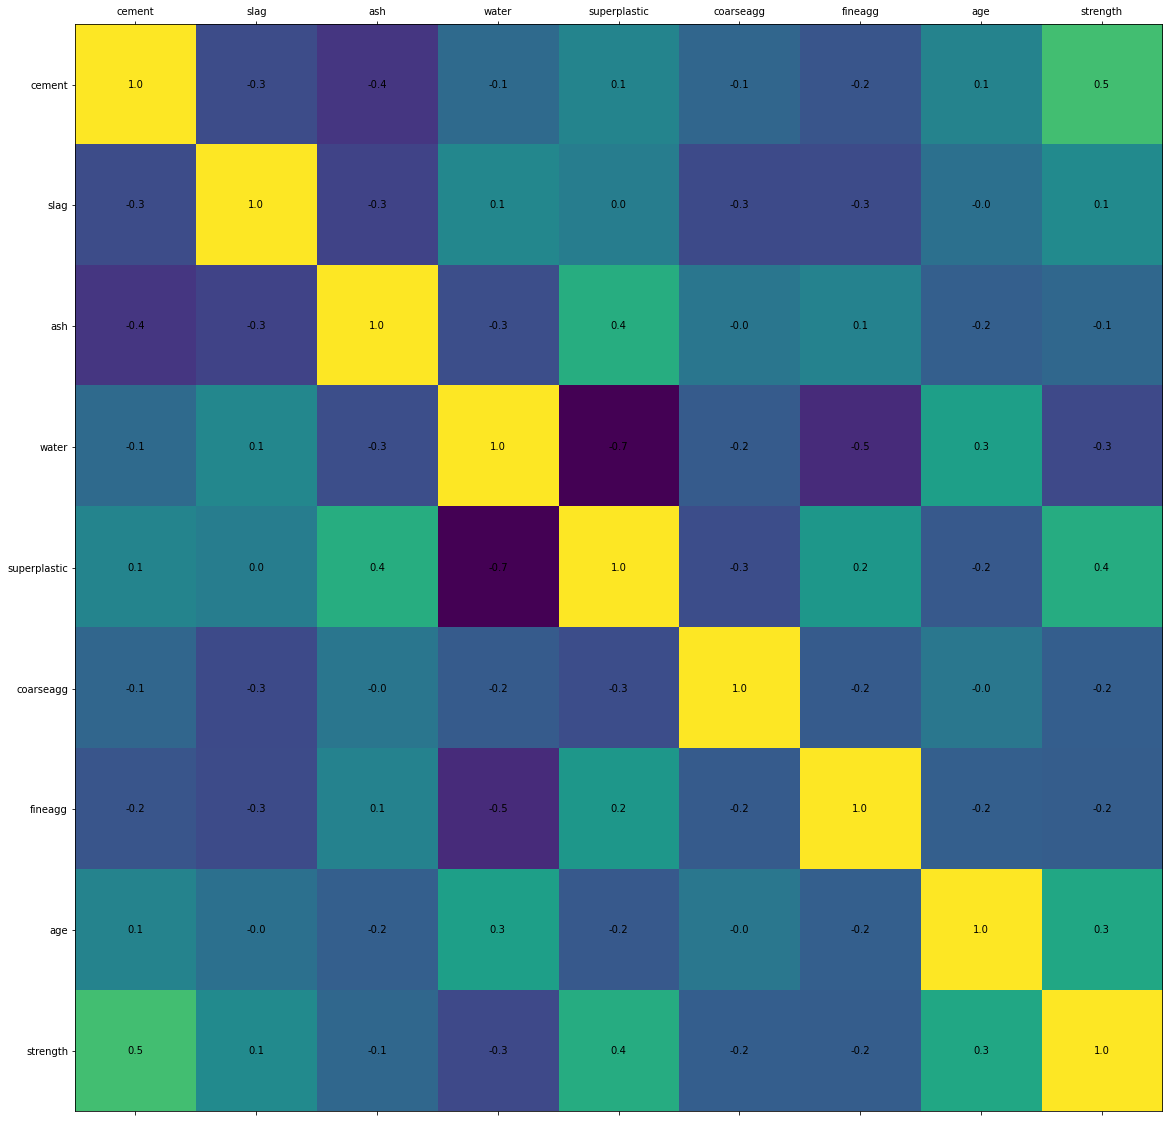

In [137]:
plot_corr(df)

### From above, we can see:
#### There is a high coorelation between Target variable and Duration of the call.
#### There is also a high corelation between two independent variables Pdays and Previous. So we will drop one of these variables.

In [155]:
# Creating new variable Age_month from Age Feature
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1622: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


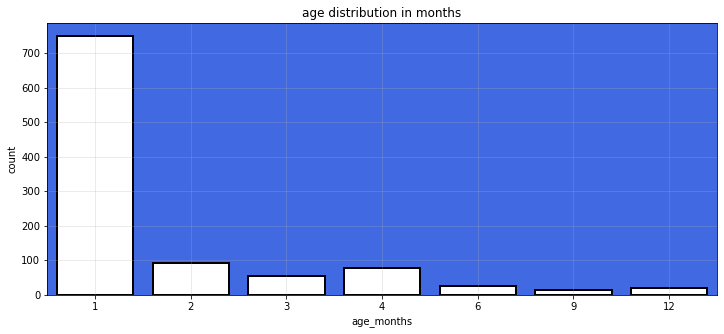

In [156]:
plt.figure(figsize=(12,5))
order = ['1','2', '3','4','6','9', '12']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [157]:
df['age_months'] = df['age_months'].astype('int')

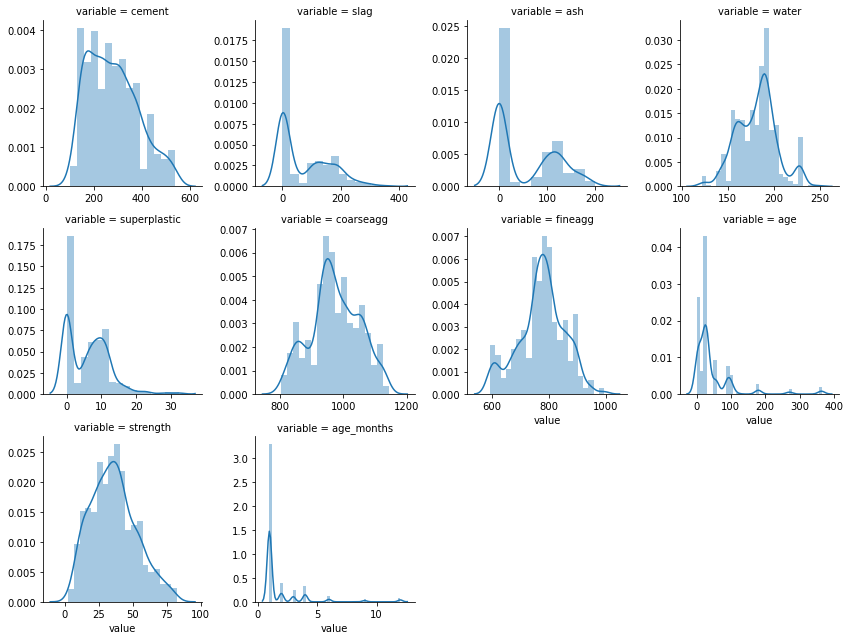

In [158]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [159]:
df2 = df.copy(deep=True)
def lab(data2):
    if data2["strength"] <= 17:
        return "1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "2"
    if data2["strength"] >28 :
        return "3 "
    
df2["strength_category"] = df2.apply(lambda df2:lab(df2) ,axis =1)
df2['strength_category'] = df2['strength_category'].astype('int')

In [162]:
df2['strength_category'] = df2['strength_category'].astype('int')

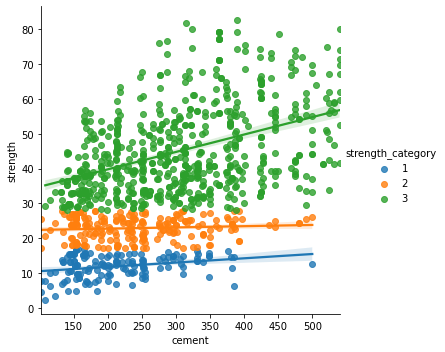

In [163]:

sns.lmplot(x='cement',y='strength',data= df2,hue= 'strength_category')

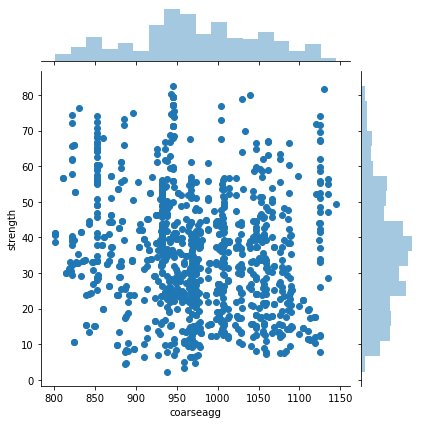

In [164]:
sns.jointplot(df2['coarseagg'],df2['strength'])


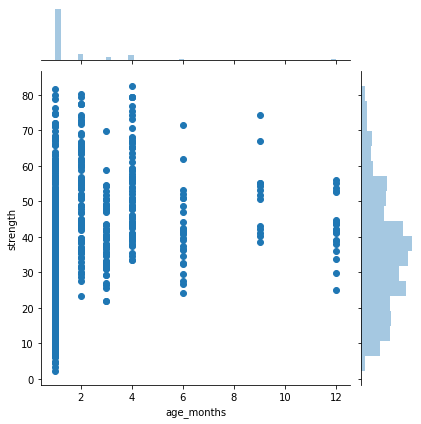

In [165]:
sns.jointplot(df2['age_months'],df2['strength'])

In [166]:
df2.info

<bound method DataFrame.info of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  age_months  strength_category  
0      

In [167]:
df2.drop(['age'],axis=1,inplace = True)


In [168]:
# df3 = df2.copy(deep=True)
# df3 = df3.replace(0.0,np.nan)

In [169]:
# df3 = df3.interpolate(method = 'linear',limit_direction='forward')
# df3.isnull().sum()

In [170]:
# print(df3.describe())
# df3.fillna(df3.mean(),inplace=True) ## As the mean and 50% are almost same;

In [171]:
X = df2.iloc[:,df2.columns !='strength']
Y = np.array(df2['strength'])

In [172]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
superplastic,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
coarseagg,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
fineagg,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6
age_months,1030.0,1.858252,2.006623,1.0,1.000,1.0,2.00,12.0
strength_category,1030.0,2.505825,0.733394,1.0,2.000,3.0,3.00,3.0


##### Creating Dummy Variables on Age_months column

In [177]:
X = pd.get_dummies(X,columns = ['age_months'],drop_first = True)
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength_category,age_months_2,age_months_3,age_months_4,age_months_6,age_months_9,age_months_12
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,0,0,0,0,0,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2,0,0,0,0,0,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3,0,0,0,0,0,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3,0,0,0,0,0,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,2,0,0,0,0,0,0


In [178]:
scaler = MinMaxScaler()
df2_normalized = scaler.fit_transform(X)
df2_normalized = pd.DataFrame(df2_normalized,columns = X.columns)

In [179]:
xtrain,xtest,ytrain,ytest = train_test_split(df2_normalized,Y,test_size = 0.3 , random_state=5)

In [180]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
y_predict_lm = lm.predict(xtest)

In [181]:
print(lm.score(xtrain,ytrain))
print(lm.score(xtest,ytest))

0.803645846853304
0.7907795331599078


In [185]:
from sklearn.ensemble import AdaBoostRegressor
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abrg = AdaBoostRegressor( n_estimators= 20)
abrg= abrg.fit(xtrain,ytrain)

test_pred = abrg.predict(xtest)
abrg.score(xtest,ytest)

0.7649365859426608

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Perform Grid-Search
gsc = GridSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_grid={
            'max_depth': [4,5,3],
            'max_features': ['sqrt','log2',0.5],
            'min_samples_leaf': [1,3],
            'min_samples_split': [2,3],
            'n_estimators': [25,50,100]
        },
        cv=5)
    
grid_result = gsc.fit(xtrain,ytrain)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, xtrain,ytrain, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-5.84322394 -5.84790901 -5.94532944 -5.61035328 -5.74189913 -5.81463071
 -5.49821476 -5.54892754 -5.3474005  -5.42723773]


In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [4,5,3],
    'max_features': ['sqrt','log2',0.5],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2,3],
    'n_estimators': [25,50,100]
}    

grid = GridSearchCV(estimator = model, param_grid = params, cv = k)

grid.fit(X_train,y_train)

In [203]:
print(grid_result,best_params)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [204]:
rfmodel = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
rfmodel.fit(xtrain,ytrain)
rf_y_pred = rfmodel.predict(xtest)

In [205]:
rfmodel.score(xtrain,ytrain)
rfmodel.score(xtest,ytest)

0.7769829160138072

In [206]:
print("Training Score",rfmodel.score(xtrain,ytrain))
print("Testing Score",rfmodel.score(xtest,ytest))

Training Score 0.845718226096932
Testing Score 0.7769829160138072


In [253]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
clf = RandomForestRegressor()


rsv =   RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_distributions={"max_depth": [4, None],
              "max_features": randint(1, 9),
              "min_samples_split": randint(2, 20),
              "min_samples_leaf": randint(1, 20)
              }
        )
    
rsv_result = rsv.fit(xtrain,ytrain)
best_params = rsv_result.best_params_
    
rfm = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],random_state=True,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfm, xtrain,ytrain, cv=10)
print(scores)

[0.79783474 0.80611553 0.80815216 0.83791408 0.77854524 0.77624223
 0.82346403 0.83410897 0.84682522 0.81225979]


In [254]:
print(rsv_result,best_params)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [255]:
rfmmodel = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"],random_state=False,
                            verbose=False)
rfmmodel.fit(xtrain,ytrain)
rf_y_pred = rfmmodel.predict(xtest)

In [256]:
print("Training Score",rfmmodel.score(xtrain,ytrain))
print("Testing Score",rfmmodel.score(xtest,ytest))

Training Score 0.8942380929028996
Testing Score 0.7989542500337239


In [314]:
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.Target.value_counts())
print(df.job.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
0    39922
1     5289
Name: Target, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [315]:
oneHotCols=["job","marital","education","default","housing","loan","contact","month"]

In [98]:
df['job'] = df['job'].replace(['unemployed'], -1)
df['job'] = df['job'].replace(['unknown'], 1)
df['job'] = df['job'].replace(['student','housemaid','retired'], 2)
df['job'] = df['job'].replace(['admin.','self-employed','technician','services','blue-collar'], 3)
df['job'] = df['job'].replace(['management','entrepreneur'], 4)
print(df.job.value_counts())

df['marital'] = df['marital'].replace(['single'], 1)
df['marital'] = df['marital'].replace(['divorced'], 2)
df['marital'] = df['marital'].replace(['married'], 3)
print(df.marital.value_counts())

df['education'] = df['education'].replace(['unknown'], 1)
df['education'] = df['education'].replace(['primary'], 2)
df['education'] = df['education'].replace(['secondary'], 3)
df['education'] = df['education'].replace(['tertiary'], 4)
print(df.education.value_counts())

df['housing'] = df['housing'].replace(['no'], 0)
df['housing'] = df['housing'].replace(['yes'], 1)
print(df.housing.value_counts())

df['default'] = df['default'].replace(['no'], 0)
df['default'] = df['default'].replace(['yes'], 1)
print(df.default.value_counts())

df['loan'] = df['loan'].replace(['no'], 0)
df['loan'] = df['loan'].replace(['yes'], 1)
print(df.loan.value_counts())


df['contact'] = df['contact'].replace(['unknown'], 1)
df['contact'] = df['contact'].replace(['telephone'], 2)
df['contact'] = df['contact'].replace(['cellular'], 3)
print(df.contact.value_counts())

df['month'] = df['month'].replace(["jan","feb","mar"], 1)
df['month'] = df['month'].replace(["apr","may","jun"], 2)
df['month'] = df['month'].replace(["jul","aug","sep"], 3)
df['month'] = df['month'].replace(["oct","nov","dec"], 4)

print(df.month.value_counts())



# df=df_l.replace(replaceStruct)
# #df=pd.get_dummies(df, columns=oneHotCols,drop_first = True)
# df_l.head(10)

 3    28233
 4    10945
 2     4442
-1     1303
 1      288
Name: job, dtype: int64
3    27214
1    12790
2     5207
Name: marital, dtype: int64
3    23202
4    13301
2     6851
1     1857
Name: education, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    44396
1      815
Name: default, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
3    29285
1    13020
2     2906
Name: contact, dtype: int64
2    22039
3    13721
4     4922
1     4529
Name: month, dtype: int64


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  Target     45211 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 2.8 MB


### Logistic Model Creation

In [317]:
# Split the data into training and test set in the ratio of 70:30 respectively
# independant variables
x = df.drop(["Target"], axis=1)
# the dependent variable
y = df[["Target"]]
df.shape

(45211, 15)

In [318]:
# Creating Dummy Variables
x=pd.get_dummies(x, columns=oneHotCols,drop_first = True)
x.head(10)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,1,-1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,35,231,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,28,447,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,42,2,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,58,121,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,43,593,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [319]:
#Build the logistic regression model
import statsmodels.api as sm

# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)


##### Checking data split

In [320]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [321]:
#### Check Term deposit acceptance ratio in split data

In [322]:
print("Original Term Deposit True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df.index)) * 100))
print("Original Term Deposit False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df.index)) * 100))
print("")
print("Training Term Deposit True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 1]), (len(y_train[y_train['Target'] == 1])/len(y_train)) * 100))
print("Training Term Deposit False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 0]), (len(y_train[y_train['Target'] == 0])/len(y_train)) * 100))
print("")
print("Test Term Deposit True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 1]), (len(y_test[y_test['Target'] == 1])/len(y_test)) * 100))
print("Test Term Deposit False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 0]), (len(y_test[y_test['Target'] == 0])/len(y_test)) * 100))
print("")

Original Term Deposit True Values    : 5289 (11.70%)
Original Term Deposit False Values   : 39922 (88.30%)

Training Term Deposit True Values    : 3755 (11.87%)
Training Term Deposit False Values   : 27892 (88.13%)

Test Term Deposit True Values        : 1534 (11.31%)
Test Term Deposit False Values       : 12030 (88.69%)



In [323]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.315849
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31608
Method:                           MLE   Df Model:                           38
Date:                Sun, 18 Oct 2020   Pseudo R-squ.:                  0.1328
Time:                        16:10:45   Log-Likelihood:                -9995.7
converged:                       True   LL-Null:                       -11527.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1499      0.165     -6.984      0.000      -1.473      -0.827
ag

In [324]:
#Calculate the odds ratio
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [325]:
# Filter by significant P- Value (pval <0.1) and sort descending by odds ratio
lgcoef = lgcoef.sort_values(by = "Odds_ratio",ascending = False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
month_mar,1.15,3.16,0.76,0.00
month_sep,0.89,2.44,0.71,0.00
month_dec,0.81,2.25,0.69,0.00
month_oct,0.71,2.04,0.67,0.00
education_tertiary,0.43,1.54,0.61,0.00
job_retired,0.43,1.53,0.61,0.00
job_student,0.27,1.31,0.57,0.02
education_unknown,0.25,1.28,0.56,0.02
education_secondary,0.21,1.24,0.55,0.00
month_jun,0.19,1.21,0.55,0.05


In [326]:
x=x.drop(['day','job_-1','job_1','job_4','contact_2'],axis=1)
x.info()

KeyError: "['job_-1' 'job_1' 'job_4' 'contact_2'] not found in axis"

In [ ]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

features = x.iloc[:,:].values
target = y.values


X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=7)

logreg = LogisticRegression(random_state=7,penalty='l2', solver='newton-cg')  #assigning a variable for the algorithm

logreg.fit(X_train, y_train) #training of model

In [327]:
y_predict = logreg.predict(X_test)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",logreg.score(X_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",logreg.score(X_test, y_test))   # this will give testing accuracy as testing data has been used

ValueError: X has 38 features per sample; expecting 17

In [114]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

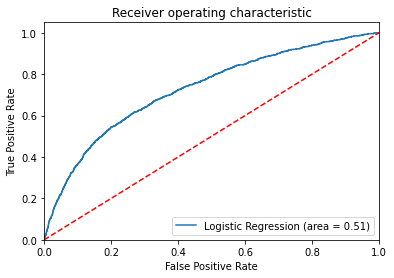

In [115]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [116]:
## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()   


In [117]:
preds = logreg.predict(X_test)

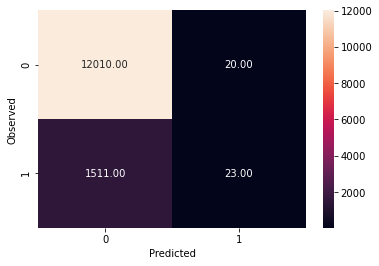

None

Recall: 0.01499348109517601

Precision: 0.5348837209302325

F1 Score: 0.029169308814204185

Roc Auc Score: 0.506665485352243


In [118]:
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

In [119]:
acc_LR = accuracy_score(y_test, preds)
F1_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': acc_LR,'F1 Score': F1_LR,'Precision':precision_LR,'Recall':recall_LR})
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01


In [120]:
def get_roc_cure(model,title):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= title + '(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


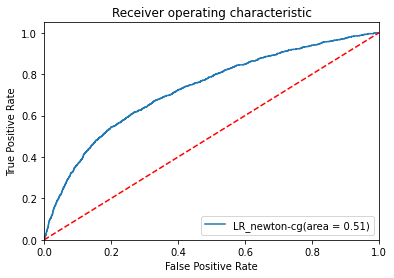

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


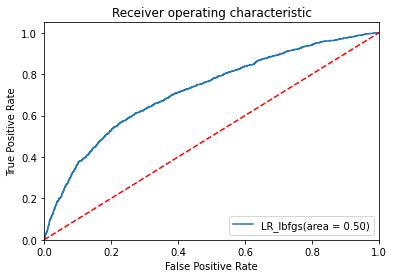

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


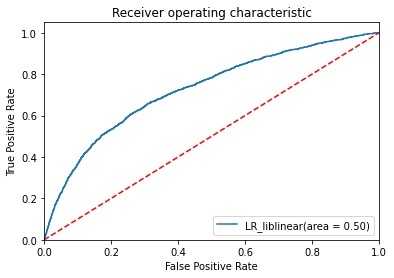

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


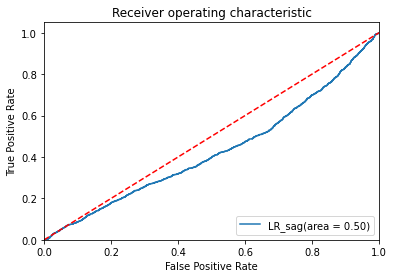

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


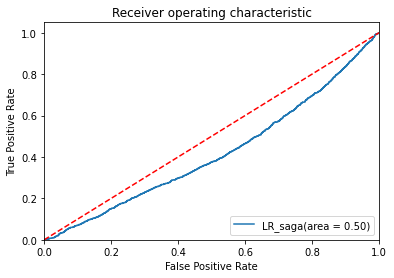

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.882, 0.881, 0.882, 0.881, 0.872]

[0.887, 0.886, 0.887, 0.886, 0.879]


In [121]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test) 
    get_roc_cure(model,'LR_'+i)
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))
    
    
print(solver)
print()
print(train_score)
print()
print(test_score)

#### Highest accuracy is with 'newton-cg'

### Decision Tree Creation

In [122]:
df.head

<bound method NDFrame.head of        age job marital education default  balance housing loan contact  day  \
0       58   4       3         4       0     2143       1    0       1    5   
1       44   3       1         3       0       29       1    0       1    5   
2       33   4       3         3       0        2       1    1       1    5   
3       47   3       3         1       0     1506       1    0       1    5   
4       33   1       1         1       0        1       0    0       1    5   
...    ...  ..     ...       ...     ...      ...     ...  ...     ...  ...   
45206   51   3       3         4       0      825       0    0       3   17   
45207   71   2       2         2       0     1729       0    0       3   17   
45208   72   2       3         3       0     5715       0    0       3   17   
45209   57   3       3         3       0      668       0    0       2   17   
45210   37   4       3         3       0     2971       0    0       3   17   

      month  campaign

#### Split df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [123]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df.drop('Target',axis=1), df['Target'], test_size=.30,
                                                   random_state=22)
X_train.shape,X_test.shape


((31647, 13), (13564, 13))

In [124]:
df.shape

(45211, 14)

In [125]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [126]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [127]:
model_entropy.score(X_train, y_train)  # performance on train data

0.9999684014282555

In [128]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8230610439398408

#### Pruning the model

In [129]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 22,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=22)

In [140]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = df.drop('Target', axis=1)
feature_cols = xvar.columns

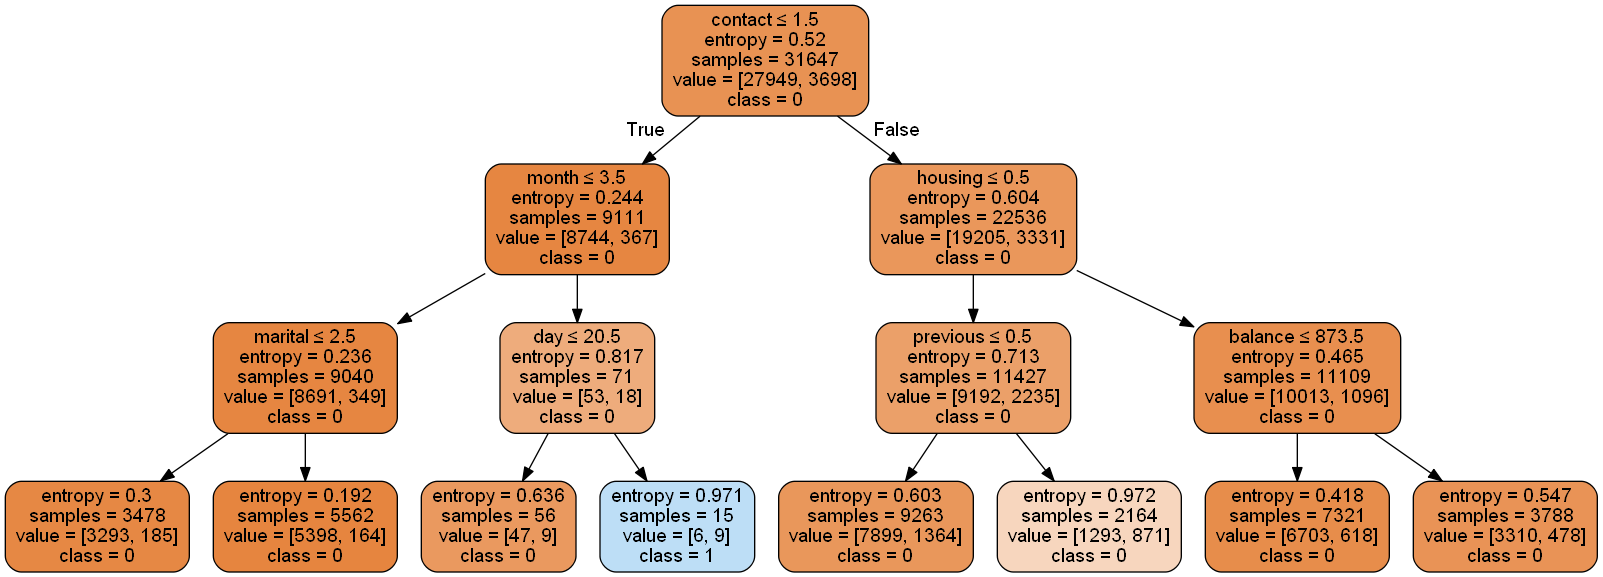

In [141]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\programdata\\Anaconda3\\Library\\bin\\graphviz'
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Target_pruned.png')
Image(graph.create_png())

In [142]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8829253907401946
0.8832432774038613


In [144]:
acc_DT = accuracy_score(y_test, preds_pruned)
F1_DT = f1_score(y_test, preds_pruned)
precision_DT = precision_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned)
print(acc_DT)
print(F1_DT)
print(precision_DT)
print(recall_DT)

0.8829253907401946
0.006257822277847309
0.7142857142857143
0.0031426775612822125


In [145]:
preds_pruned_train[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [146]:
preds_pruned[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [147]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
contact,0.42
previous,0.31
housing,0.21
balance,0.02
month,0.02
marital,0.02
day,0.01
age,0.00
job,0.00
education,0.00


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': acc_DT,'F1 Score': F1_DT,'Precision':precision_DT,'Recall':recall_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00


##### Creating a model through Balanced Random Forest

In [151]:
from imblearn.ensemble import BalancedRandomForestClassifier
from funcsigs import signature
import sklearn.cluster
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [152]:
brf.score(X_test, y_test)  # performance on test data

0.7336331465644352

In [153]:
brf.score(X_train, y_train)  # performance on test data

0.8294941068663696

In [154]:
acc_brf = accuracy_score(y_test, y_pred)
F1_brf = f1_score(y_test, y_pred)
precision_brf = precision_score(y_test, y_pred)
recall_brf = recall_score(y_test, y_pred)
print(acc_brf)
print(F1_brf)
print(precision_brf)
print(recall_brf)

0.7336331465644352
0.3704478132078759
0.25626808100289294
0.6681332495285983


In [167]:
tempResultsbrf = pd.DataFrame({'Method':['Balanced Random Forest'], 'Accuracy': acc_brf,'F1 Score': F1_brf,'Precision':precision_brf,'Recall':recall_brf})
resultsDf = pd.concat([resultsDf, tempResultsbrf])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05
0,Gradient Boost,0.88,0.08,0.54,0.04
0,Balanced Random Forest,0.73,0.37,0.26,0.67


#### Creating of Model using Bagging Technique

In [155]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [156]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
F1_BG = f1_score(y_test, pred_BG)
precision_BG = precision_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)
print(acc_BG)
print(F1_BG)
print(precision_BG)
print(recall_BG)

0.884399882040696
0.25757575757575757
0.5220729366602687
0.17096165933375235


In [157]:
tempResultsBG = pd.DataFrame({'Method':['Bagging'], 'Accuracy': acc_BG,'F1 Score': F1_BG,'Precision':precision_BG,'Recall':recall_BG})
resultsDf = pd.concat([resultsDf, tempResultsBG])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17


##### Creating Model by using Adaboost Ensemble Algorithm

In [158]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 10, learning_rate=1.0, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [159]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
F1_AB = f1_score(y_test, pred_AB)
precision_AB = precision_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)
print(acc_AB)
print(F1_AB)
print(precision_AB)
print(recall_AB)

0.8829253907401946
0.09567198177676538
0.509090909090909
0.05279698302954117


In [160]:
tempResultsAB = pd.DataFrame({'Method':['Adaptive Boost'], 'Accuracy': acc_AB,'F1 Score': F1_AB,'Precision':precision_AB,'Recall':recall_AB})
resultsDf = pd.concat([resultsDf, tempResultsAB])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05


In [161]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

##### Creating Model by using Gradient boost Ensemble Algorithm

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [165]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
F1_GB = f1_score(y_test, pred_GB)
precision_GB = precision_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)

#### Creating a dataframe to compare different models and their metrics

In [166]:
tempResultsGB = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': acc_GB,'F1 Score': F1_GB,'Precision':precision_GB,'Recall':recall_GB})
resultsDf = pd.concat([resultsDf, tempResultsGB])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05
0,Gradient Boost,0.88,0.08,0.54,0.04


#### Business Conclusion

#### Since it is a problem statement where we need to find if customer would subscribe for a term deposit or not. Hence even if we have some false positives but that won't be a direct impact to the existing business of the bank. So for this problem statement, I would go for Accuracy and Precision as the true metrics to identify the best Model.

##### Though the accuracy is same for all the models that we have created but we have highest Precision and F1 score for Bagging technique. Hence, I declare Bagging as the best model for this problem statement